In [14]:
import numpy as np
from sklearn.metrics import roc_auc_score
import json
def Get_auroc(accuracy,confidence_scores):
    y_true=np.where(np.array(accuracy) < 0.6,0,1)
    return roc_auc_score(np.array(y_true), np.array(confidence_scores))

with open('CAPR/din0s_asqa_r4_with_vanilla_Vanilla.json','r') as f:
    data=json.load(f)

print(Get_auroc(data['acc'],data['conf']))
print(Get_auroc(data['acc_capr'],data['conf_capr']))



0.4444444444444444
0.5161290322580645


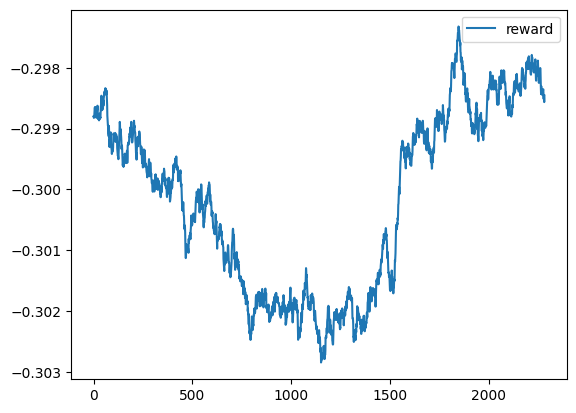

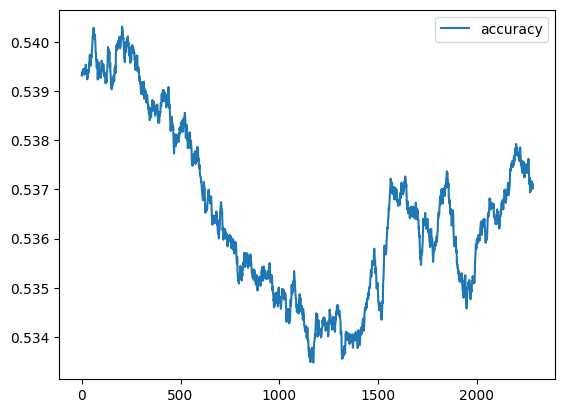

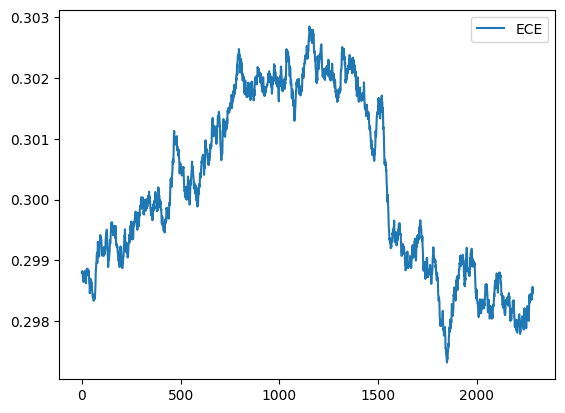

In [13]:
import json
import matplotlib.pyplot as plt
with open('CAPR/PPO_State_06122032_vanilla_f1_r3/reward.json','r') as f:
    data=json.load(f)
movin_avg=sum(data[:30])/30
k1=[]
for i in data:
    movin_avg=0.998*movin_avg+(1-0.998)*i
    k1.append(movin_avg)

plt.plot(range(len(k1)),k1,label='reward')
plt.legend()
plt.show()

with open('CAPR/PPO_State_06122032_vanilla_f1_r3/Accuracy.json','r') as f:
    data=json.load(f)
movin_avg=sum(data[:30])/30
k2=[]
for i in data:
    movin_avg=0.998*movin_avg+(1-0.998)*i
    k2.append(movin_avg)

plt.plot(range(len(k2)),k2,label='accuracy')
plt.legend()
plt.show()

with open('CAPR/PPO_State_06122032_vanilla_f1_r3/ECE.json','r') as f:
    data=json.load(f)
movin_avg=sum(data[:30])/30
k2=[]
for i in data:
    movin_avg=0.998*movin_avg+(1-0.998)*i
    k2.append(movin_avg)

plt.plot(range(len(k2)),k2,label='ECE')
plt.legend()
plt.show()


In [49]:
import torch
from netcal.metrics import ECE
from torch import rand
import numpy as np
def get_ece(y_confs,y_true):
    y_confs=np.array([i.item() for i in y_confs])
    y_true=np.array([i.item() for i in y_true])
    accuracy = np.mean(y_true)
    # y_true=np.where(y_true < accuracy,0,1) ## change to binary ## init 0.59
    # ECE
    n_bins = 10
    # diagram = ReliabilityDiagram(n_bins)
    ece = ECE(n_bins)
    ece_score = ece.measure(y_confs, y_true)
    # print("ECE:", ece_score)
    return torch.tensor(ece_score)

y_true=rand(size=(128,))/10+0.5
y_conf=rand(size=(128,))/10+0.8

ece=torch.abs(y_true-y_conf)
print(-torch.mean(ece))


tensor(-0.3046)


## Rouge

In [ ]:
from rouge_score import rouge_scorer

def calculate_rouge(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)['rougeL'].precision
    return scores

# Example usage
reference = "The cat sat on the mat."
hypothesis = "The cat is sitting on the mat."
scores = calculate_rouge(reference, hypothesis)
print(scores)


## Get Fig

Load Sucess din0s/asqa vanilla Cos_sim
[0.9011191129684448, 0.7139077186584473, 0.6959252953529358, 0.6239468455314636, 0.7923579216003418, 0.7394685745239258, 0.9088935852050781, 0.8200587034225464, 0.8223246932029724, 0.8889890313148499, 0.7467327117919922, 0.8155412077903748, 0.7386431694030762, 0.8547325134277344, 0.6413312554359436, 0.8553297519683838, 0.9009358882904053, 0.7564465403556824, 0.6646835207939148, 0.7781188488006592, 0.6402304768562317, 0.784237265586853, 0.7003297209739685, 0.6990205645561218, 0.9147351980209351, 0.7723273634910583, 0.9215450286865234, 0.8305558562278748, 0.8009777069091797, 0.5296708345413208, 0.26629799604415894, 0.8584222793579102, 0.8392785787582397, 0.5542304515838623, 0.7776930332183838, 0.7287003397941589, 0.7244746685028076, 0.7359813451766968, 0.8927393555641174, 0.7304853200912476, 0.780105710029602, 0.21385318040847778, 0.9230879545211792, 0.8412880897521973, 0.33716943860054016, 0.5736278295516968, 0.6467647552490234, 0.6734513640403748,

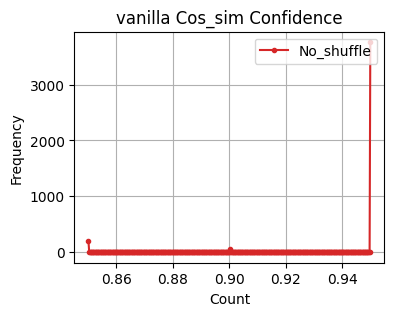

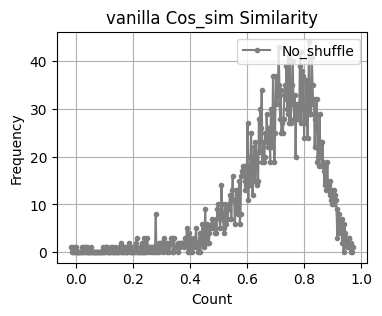

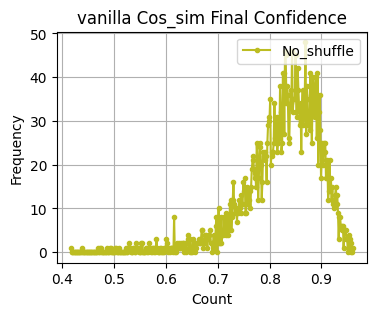

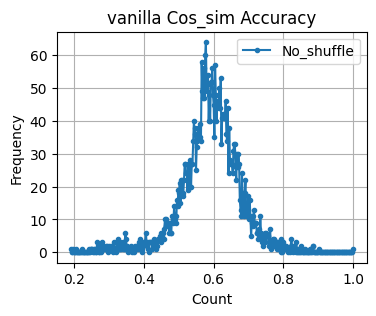

Load Sucess din0s/asqa cot Cos_sim
[0.1900711953639984, 0.5550377368927002, 0.7514224052429199, 0.6832405924797058, 0.7183776497840881, 0.533359944820404, 0.7185369729995728, 0.6233872771263123, 0.7125352025032043, 0.7495017647743225, 0.23761574923992157, 0.8997487425804138, 0.40413641929626465, 0.5794488191604614, 0.5710238218307495, 0.7963523268699646, 0.7850556373596191, 0.433273047208786, 0.3453189730644226, 0.6292398571968079, 0.761655867099762, 0.5553650856018066, 0.16679005324840546, 0.4641646444797516, 0.52333664894104, 0.6874661445617676, 0.6595967411994934, 0.6722018122673035, 0.5661526322364807, 0.6141760945320129, 0.7202908992767334, 0.7843295335769653, 0.13718821108341217, 0.8069182634353638, 0.6780006885528564, 0.6038378477096558, 0.2934013605117798, 0.714750349521637, 0.8318974375724792, 0.6199164390563965, 0.6395681500434875, 0.7908684611320496, 0.6376857757568359, 0.733983039855957, 0.9006523489952087, 0.24722017347812653, 0.687402606010437, 0.5584778189659119, 0.18874

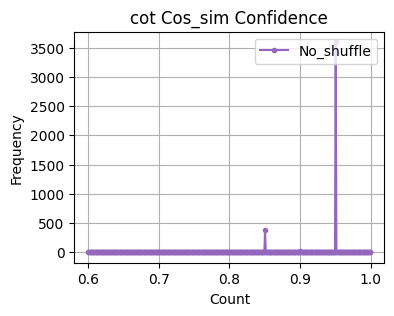

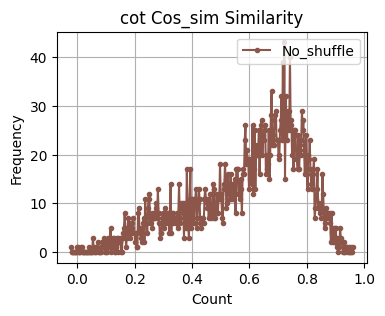

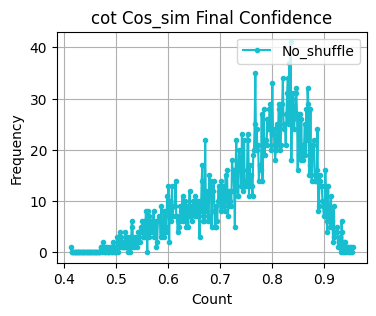

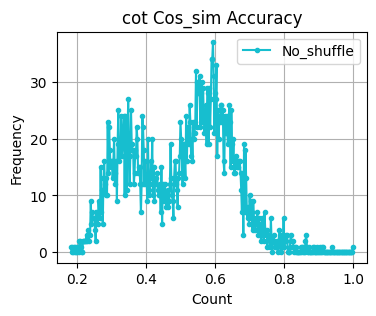

Load Sucess din0s/asqa multi_step Cos_sim
[0.5712885856628418, 0.21721333265304565, 0.3945944607257843, 0.864517092704773, 0.6846323013305664, 0.7428550720214844, 0.6226062774658203, 0.45964908599853516, 0.6327592134475708, 0.6264137029647827, 0.8260688781738281, 0.6750409603118896, 0.35980910062789917, 0.6190224289894104, 0.31245243549346924, 0.8536441326141357, 0.6428394317626953, 0.6705385446548462, 0.7538188695907593, 0.6794417500495911, 0.8068566918373108, 0.4454425871372223, 0.7748888731002808, 0.7107048630714417, 0.6918771862983704, 0.7829947471618652, 0.8372174501419067, 0.5567104816436768, 0.39860135316848755, 0.5915688872337341, 0.6000528335571289, 0.441996693611145, 0.5855063199996948, 0.5551022291183472, 0.5437314510345459, 0.6362171173095703, 0.582692563533783, 0.6643279194831848, 0.6405037641525269, 0.5697674751281738, 0.48500314354896545, 0.5440643429756165, 0.7300242781639099, 0.5051146149635315, 0.74720299243927, 0.7742213606834412, 0.6885970830917358, 0.11064049601554

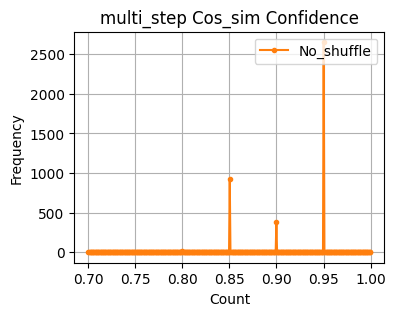

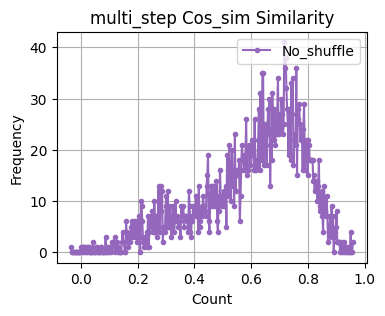

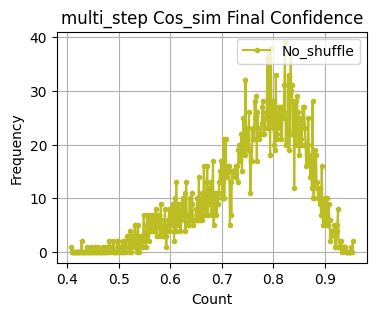

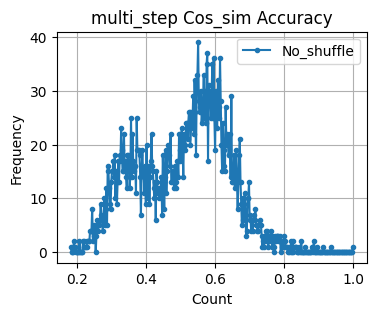

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import json,random,os

# datapath="response_result/20240517/din0s_asqa_gpt-3.5-turbo-0125_cot_Long_QA_gpt-3.5-turbo-0125_bertscore.json"

def get_datapath(dataset,api_model,activate_time,acc_model,sim_model,prompt_strategy,isshuffle_str)-> list:


    task=["QA","Long_QA"]
    datapath=[]
    for i in prompt_strategy:
        for t in task:
            path=f"response_result/{activate_time}/{dataset}_{api_model}_{i}_{t}_{sim_model}_{acc_model}_{isshuffle_str}.json"
            print(path)
            if os.path.isfile(path):
                datapath.append(path)

    return datapath

def mean(data):
    return sum(data)/len(data)

def Load_data(datapath):
    with open(datapath,'r') as f:
        data=json.load(f)

    conf=[i['Confidence'] for i in data]
    ## MAX
    simi=[max(map(float,i['Doc_Ans_simi'])) for i in data]
    ## Mean
    mean_simi=[sum(map(float,i['Doc_Ans_simi']))/len(i['Doc_Ans_simi']) for i in data]
    acc=[i['Accuracy'] for i in data]
    assert len(simi)==len(conf)
    return [conf,mean_simi,acc]

# color=['lightblue','lightred',"lightgreen","yellow",'pink','lightbrown']
def Get_histogram(datalist,dataset,title,stretagy):
# Generate sample data
    # data1 = np.random.normal(0, 1, 1000)
    plt.figure(figsize=(4, 3))
    colors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    # assert len(lable)==len(datalist)
    # Plot histograms
    for idx,i in enumerate(datalist):
        plt.hist(i, bins=100, alpha=0.7, label=stretagy[idx],color=colors[idx% len(colors)])
    # Adding labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f"{dataset}_{title}")
    plt.legend(loc='upper right')
    plt.xlim([0, 1])
    # plt.ylim([0, 600])
    # Show the plot
    plt.savefig(f"picture/histogram/{dataset}_{title}.png")
    # plt.show()
    plt.clf

def convert_binary_acc(y_true):
    mean_acc=[np.mean(np.array(i)) for i in y_true] ## change to binary

    y_true=[np.where(np.array(i) < mean_acc[idx],0,1) for idx,i in enumerate(y_true)] ## change to binary
    return y_true


def show_histogram_graph(vector,title,File_name,stretagy="",sim="",datafile_name="",label=[]):
    os.makedirs(f"PACE/picture/histogram/{File_name}",exist_ok=True)
    # Plot histogram
    plt.figure(figsize=(4, 3))
    colors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    random.shuffle(colors)
    for i,j in zip(vector,label):
        plt.hist(i, bins=100, density=True, alpha=0.7, color=colors[random.randint(0,len(colors)-1)], edgecolor='black',label=j)
    # Add a title and labels
    plt.title(f'{title}')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    # plt.ylim(0,1)
    plt.xlim(0,1)
    # Add a grid
    plt.grid(True)
    plt.legend(loc='upper right')
    # Show plot
    plt.savefig(f"PACE/picture/histogram/{File_name}/{datafile_name}.png")
    # plt.show()
    plt.clf

def show_plot_graph(vector,title,File_name,stretagy="",sim="",datafile_name="",label=""):
    os.makedirs(f"PACE/picture/histogram/{File_name}",exist_ok=True)
    # Plot histogram
    plt.figure(figsize=(4, 3))
    colors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    random.shuffle(colors)
    # vector=sorted(vector)
    counts, bin_edges = np.histogram(vector, bins=len(vector)//10)

    # 計算每個柱的中心點
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # plt.hist(vector, bins=30, alpha=0.3, color='gray', edgecolor='black')

    plt.plot(bin_centers,counts, marker='.',linestyle='-', color=colors[random.randint(0,len(colors)-1)],label=label)
    # Add a title and labels
    plt.title(f'{title}')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    # plt.ylim(0,1)
    # Add a grid
    plt.grid(True)
    plt.legend(loc='upper right')
    # Show plot
    plt.savefig(f"PACE/picture/histogram/{File_name}/{datafile_name}.png")
    plt.show()
    plt.clf


def Update_Fig(activate_time,shuffle):
    isshuffle_str="shuffle" if shuffle else "No_shuffle"
    datapaht=f"./PACE/response_result/Evaluate_Result_{activate_time}_{isshuffle_str}.json"
    with open(datapaht,'r') as f:
        data=json.load(f)

    os.makedirs("PACE/picture/histogram",exist_ok=True)
    simi_models=["Cos_sim"]
    datasets=["din0s/asqa"]
    api_model='gpt-3.5-turbo-0125'
    acc_model='f1'

    stretagy=["vanilla",'cot',"multi_step"]

    for sim in simi_models:
        for dataset in datasets:
            for dd in data:
                for k in stretagy:
                    # conf_list,Final_conf_list,simi_list,acc_list=[],[],[],[]
                    if dd['dataset']==dataset and dd['sim_model']==sim and dd['Stratagy']==k and dd['acc_model']==acc_model:
                        print(f"Load Sucess {dataset} {k} {sim}")
                        # conf_list.append(dd['Conf'])
                        # Final_conf_list.append(dd['Pace_Conf'])
                        # simi_list.append(dd['Simi'])
                        # acc_list.append(dd['Accuracy'])
                        dataset_path=dataset.replace("/","_")
                        print(dd['Simi'])
                        show_plot_graph(dd['Conf'],File_name=f"{activate_time}_{isshuffle_str}",title=f"{k} {sim} Confidence",stretagy=k,sim=f"{sim}",datafile_name=f"{dataset_path}_{isshuffle_str}_{sim}_{k}_Confidence",label=f"{isshuffle_str}")

                        show_plot_graph(dd['Simi'],File_name=f"{activate_time}_{isshuffle_str}",title=f"{k} {sim} Similarity",stretagy=k,sim=f"{sim}",datafile_name=f"{dataset_path}_{isshuffle_str}_{sim}_{k}_Similarity",label=f"{isshuffle_str}")

                        show_plot_graph(dd['Pace_Conf'],File_name=f"{activate_time}_{isshuffle_str}",title=f"{k} {sim} Final Confidence",stretagy=k,sim=f"{sim}",datafile_name=f"{dataset_path}_{isshuffle_str}_{sim}_{k}_PACE_Confidence",label=f"{isshuffle_str}")

                        show_plot_graph(dd['Accuracy'],File_name=f"{activate_time}_{isshuffle_str}",title=f"{k} {sim} Accuracy",stretagy=k,sim=f"{sim}",datafile_name=f"{dataset_path}_{isshuffle_str}_{sim}_{k}_Accuracy",label=f"{isshuffle_str}")

Update_Fig("20240601",False)


In [ ]:
def show_histogram_graph(vector,dim_x_y,stretagy=""):
    # Plot histogram
    plt.figure(figsize=(4, 3))
    plt.hist(vector, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
    # Add a title and labels
    plt.title(f'{stretagy} Score')
    plt.xlabel('Confidence Value')
    plt.ylabel('Density')
    # plt.ylim(0,1)
    plt.xlim(0,1)
    # Add a grid
    plt.grid(True)

    # Show plot
    # plt.savefig(f"picture/histogram/{dataset}_{title}.png")
    plt.show()
    plt.clf

from netcal.metrics import ECE

activate_time="20240529"

os.makedirs("picture/histogram",exist_ok=True)
simi_models=["Cos_sim","snli"]
datasets=["natural_questions",'din0s_asqa']
api_model='gpt-3.5-turbo-0125'
acc_model='bertscore'

stretagy=["vanilla",'cot',"multi_step"]

simi_model="snli"
dataset="din0s_asqa"

path_list=get_datapath(dataset=dataset,api_model=api_model,activate_time=activate_time,acc_model=acc_model,sim_model=simi_model,prompt_strategy=stretagy)

evaldata=list(map(Load_data,path_list))

for k in range(3):
    accuracy=np.mean(np.array(evaldata[k][2]))
    y_confs=evaldata[k][0]
    y_true=list(map(float,evaldata[k][2]))
    y_true=np.where(np.array(y_true) < 0.9,0,1)

    ll=0.5
    pace_conf_array = np.add(ll*np.array(evaldata[k][0]),(1-ll)*np.array(evaldata[k][1]))

    # ECE
    n_bins = 10
    # diagram = ReliabilityDiagram(n_bins)
    ece = ECE(n_bins)
    assert len(y_confs)==len(y_true)
    ece_score = ece.measure(np.array(y_confs), np.array(y_true),uncertainty='mean')
    print("ECE:", ece_score)

    n_bins = 10
    # diagram = ReliabilityDiagram(n_bins)
    ece = ECE(n_bins)
    ece_pace_score = ece.measure(pace_conf_array, np.array(y_true))
    print("ECE_PACE:", ece_pace_score)

    print(f"conf origin {np.mean(y_confs)}, PACE {np.mean(pace_conf_array)}")

    show_histogram_graph(y_confs,dim_x_y=[0,1],stretagy=f"{simi_model}")

    show_histogram_graph(evaldata[k][1],dim_x_y=[0,1],stretagy=f"{simi_model}")

    show_histogram_graph(pace_conf_array,dim_x_y=[0,1],stretagy=f"{simi_model}")

    # show_histogram_graph(y_true,dim_x_y=[0,1],stretagy=f"{simi_model}")

In [ ]:
from transformers import BertTokenizer

def split_text_into_fixed_length_parts(text, tokens_per_part, model_name='bert'):

    model_huggingface={
        'bert':'bert-base-uncased',
        'xbert':'efederici/sentence-bert-base',
    }

    # Initialize the tokenizer
    tokenizer = BertTokenizer.from_pretrained(model_huggingface[model_name])

    # Tokenize the text
    tokens = tokenizer.tokenize(text)

    # Initialize the list to hold each part
    parts = []

    # Calculate the number of full parts
    full_parts = len(tokens) // tokens_per_part

    # Create parts with exactly tokens_per_part tokens
    for i in range(full_parts):
        start_index = i * tokens_per_part
        end_index = start_index + tokens_per_part
        part_tokens = tokens[start_index:end_index]
        # Convert token list to string and add to the parts list
        parts.append(tokenizer.convert_tokens_to_string(part_tokens))

    # Handle the remaining tokens, if any
    if len(tokens) % tokens_per_part:
        remaining_tokens = tokens[full_parts * tokens_per_part:]
        parts.append(tokenizer.convert_tokens_to_string(remaining_tokens))

    return parts

# Example usage
text = "Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face.Here is an example text that we want to split into parts where each part has exactly 96 tokens, using a tokenizer from Hugging Face."
tokens_per_part = 96
result = split_text_into_fixed_length_parts(text, tokens_per_part,'bert')
result = split_text_into_fixed_length_parts(text, tokens_per_part,'xbert')


## ACC

In [ ]:
import json
from tokenizers.normalizers import BertNormalizer
from evaluate import load
def load_data():
    with open('/home/thesis/confidence_Score/response_result/gpt-3.5-turbo-0125_vanilla_simi_2024_05_08.json','r') as f:
        data=json.load(f)
    # print(data.keys())
    simi_res=data['When did the kokoda war start and end?']['similarity_res']
    olddat=simi_res[0]
    for i in simi_res:
        if i[1] > olddat[1]:
            olddat=i
    ans,long_ans=olddat[2],olddat[3]
    return ans,long_ans
def Bernormalize(ans,long_ans):
    nomalizer=BertNormalizer(clean_text=True,lowercase=True,handle_chinese_chars=True)
    return nomalizer.normalize_str(ans),nomalizer.normalize_str(long_ans)

### WER metric

In [ ]:
ans,long_ans=load_data()
print(ans)
print(long_ans)
wer_metric = load("wer")
acc_wer = wer_metric.compute(references=[ans], predictions=[long_ans])
print(f"WER acc : {acc_wer}")
print(f"1- WER acc : {1-acc_wer}")

### EM Score

In [ ]:
ans,long_ans=load_data()
print(ans)
print(long_ans)
exact_match_metric = load("exact_match")
results = exact_match_metric.compute(predictions=[ans], references=[long_ans])
print(results['exact_match'])

### Semantic similarity

In [ ]:
from sentence_transformers import SentenceTransformer, util
ans,long_ans=load_data()

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#Compute embedding for both lists
embedding_1= model.encode(ans, convert_to_tensor=True)
embedding_2 = model.encode(long_ans, convert_to_tensor=True)

result=util.pytorch_cos_sim(embedding_1, embedding_2)

print(result.item())
## tensor([[0.6003]])

### Bert Score

In [ ]:
from bert_score import score
from evaluate import load
ans,long_ans=load_data()
print(ans)
print(long_ans)


P, R, F1 = score([ans], [long_ans],lang="en",verbose=True)
# Print scores
print("Precision: ", P.item())
print("Recall: ", R.item())
print("F1 Score: ", F1.item())


bertscore = load("bertscore")
result=bertscore.compute(predictions=[ans],references=[long_ans],lang='en',verbose=True)
print("Precision: ", result['precision'].pop())
print("Recall: ", result['recall'].pop())
print("F1 Score: ", result['f1'].pop())

### Load data

In [ ]:
from util import load_checkpoint
import numpy as np
from torch.utils.data import DataLoader, Dataset, Sampler
datapath=f'response_result/gpt-3.5-turbo-0125_vanilla_2024_05_09.json'
datadict=load_checkpoint(datapath)

class eval_dataloader:
    def __init__(self,dataset_path,batch_size=1,purpose='eval') -> None:
        self.dataset = load_checkpoint(dataset_path)
        if purpose=="eval":
            self.loader=DataLoader(list(self.dataset.values()),batch_size=batch_size,collate_fn=self.simi_acc_collate_fn,shuffle=True)
        elif purpose=="ece":
            self.loader=DataLoader(list(self.dataset.values()),batch_size=batch_size,collate_fn=self.ece_collate_fn,shuffle=False)

    def simi_acc_collate_fn(self,batch):
        res=[]
        for i in batch:
            res.append([i['Question'],i['Document'],i['Answer'],i['Long Answer'],i['Confidence']])
        return res

    def ece_collate_fn(self,batch):
        simi_res=[]
        conf_res=[]
        accres=[]
        for i in batch:
            simi_res.append(i['similarity_res'])
            conf_res.append(i['confidence'])
            accres.append(i['acc'])
        return simi_res,conf_res,accres


def conf_calibration(simi,conf):
    x_lambda=0.5
    return x_lambda*simi+(1-x_lambda)*conf

def ece_calibration(simi:list,acc:list,conf:list): # batch b_m
    conf=list(map(conf_calibration,simi,conf))
    assert len(acc)==len(simi)
    b_m=len(acc)
    ece=np.mean(np.array(acc)-np.array(conf))/b_m
    return ece

def get_most_high_simi(simi_res:list):
    return sorted(simi_res,key=lambda x:x[1],reverse=True)[0][1]

eve_l=eval_dataloader(datapath,2,'eval').loader
print(len(eve_l))
# for simi_res,conf_res,accres in eve_l:
    # most_simi=list(map(get_most_high_simi,simi_res))
    # print(ece_calibration(most_simi,accres,conf_res))


In [7]:
import torch
from sklearn.metrics import f1_score
from collections import Counter

def compute_macro_f1(sentence1, sentence2):
    # Tokenize the sentences
    tokens1 = sentence1.split()
    tokens2 = sentence2.split()

    # Count the frequency of each token in both sentences
    counter1 = Counter(tokens1)
    counter2 = Counter(tokens2)

    # Create a union of all unique tokens
    all_tokens = list(set(tokens1) | set(tokens2))

    # Create binary vectors for comparison
    vector1 = torch.tensor([counter1[token] for token in all_tokens])
    vector2 = torch.tensor([counter2[token] for token in all_tokens])

    # Compute the macro-F1 score
    f1 = torch.tensor(f1_score(vector1.numpy(), vector2.numpy(), average='macro'),dtype=torch.float16)

    return f1

# Example sentences
sentence1 = "The quick brown fox jumps over the lazy dog"
sentence2 = "A quick brown fox jumps over the lazy dog"

macro_f1 = compute_macro_f1(sentence1, sentence2)
print("Macro F1 Score:", macro_f1)


Macro F1 Score: tensor(0.4443, dtype=torch.float16)


## Money Spent on API

In [ ]:
import os,glob
from util import load_checkpoint
def Calulate_spent(file_path='response_result/gpt-3.5-turbo-0125',api_model="gpt-3.5-turbo-0125"):
    compete_toekn=0
    prompt_token=0

    for datapath in glob.glob(f'{file_path}*.json'):
        if os.path.isfile(datapath):
            datares=load_checkpoint(datapath)
            print(f"{datapath} {len(datares)}")
            for i in datares.values():
                if "Complete_tokens" in i:
                    compete_toekn+=i['Complete_tokens']
                if "Prompt_tokens" in i:
                    prompt_token+=i['Prompt_tokens']

    Total_Spent =compete_toekn*8.00/1000000+prompt_token*6.00/1000000
    print(f"Complete tokens :{compete_toekn},prompt_tokens :{prompt_token} ")
    print(f"Total Spent {Total_Spent} USD ; {Total_Spent*30} TWD")


Calulate_spent()

In [9]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

def get_embedding(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1)

def is_answer_correct(question, true_answer, predicted_answer):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Get embeddings
    true_embedding = get_embedding(true_answer, model, tokenizer)
    predicted_embedding = get_embedding(predicted_answer, model, tokenizer)

    # Compute cosine similarity
    similarity = cosine_similarity(true_embedding.numpy(), predicted_embedding.numpy())[0][0]

    # Threshold for correctness
    threshold = 0.8
    print(similarity)
    return similarity >= threshold

# Example question and answers
question = "What is the capital of France?"
true_answer = "The capital of France is Paris."
predicted_answer = "Paris is the capital of France."

is_correct = is_answer_correct(question, true_answer, predicted_answer)
print("Is the answer correct?", is_correct)

0.92594755
Is the answer correct? True


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

def tokenize_sentences(text):
    # Simple sentence tokenizer (could be improved with more sophisticated methods)
    return text.split('. ')

def evaluate_long_form_qa(true_answer, predicted_answer):
    # Tokenize the answers into sentences
    true_sentences = tokenize_sentences(true_answer)
    predicted_sentences = tokenize_sentences(predicted_answer)

    # Generate binary labels
    true_labels = [1] * len(true_sentences)  # Assume all sentences in the ground truth are correct
    predicted_labels = [1 if sentence in true_sentences else 0 for sentence in predicted_sentences]

    # Calculate precision, recall, and F1 score
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    return precision, recall, f1

# Example long-form answers
true_answer = "The quick brown fox jumps over the lazy dog. Foxes are known for their agility. Dogs can be quite lazy at times."
predicted_answer = "The quick brown fox jumps over the lazy dog. Foxes are very agile animals. Sometimes dogs are lazy."

precision, recall, f1 = evaluate_long_form_qa(true_answer, predicted_answer)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 1.0
Recall: 0.3333333333333333
F1 Score: 0.5


In [23]:
from bert_score import BERTScorer
from sklearn.metrics import precision_score, recall_score, f1_score
eval_model = BERTScorer(
                        model_type="bert-base-uncased",  # Model type
                        num_layers=9,  # Number of layers to use
                        all_layers=False,  # Whether to use all layers
                        idf=False,  # Whether to use IDF scaling
                        batch_size=64,  # Batch size
                        lang=None,  # Language of the texts, auto-detect based on model if None
                        rescale_with_baseline=False,  # Whether to rescale
                        device='cuda:1'
                    )
def tokenize_sentences(text):
    # Simple sentence tokenizer (could be improved with more sophisticated methods)
    return text.split('. ')
true_answer = "The quick brown fox jumps over the lazy dog. Foxes are known for their agility. Dogs can be quite lazy at times."
predicted_answer = "The quick brown fox. The quick brown fox. The quick brown fox."

true_sentences=tokenize_sentences(true_answer)
predicted_sentences=tokenize_sentences(predicted_answer)
true_labels = [1] * len(true_sentences)  # Assume all sentences in the ground truth are correct
predicted_labels = [1 if sentence in true_sentences else 0 for sentence in predicted_sentences]
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
print(precision)
print(recall)
print(f1)


0.0
0.0
0.0


/root/miniconda3/envs/pace/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Check Data

In [ ]:
import json
conf_path='response_result/gpt-3.5-turbo-0125_vanilla_2024_05_09.json'
simi_acc_path='response_result/gpt-3.5-turbo-0125_vanilla_simi_acc_2024_05_09.json'
with open(simi_acc_path,'r') as f:
    data1=json.load(f)
    print(len(data1))
    for i in data1.keys():
        print(i)

with open(conf_path,'r') as f:
    data2=json.load(f)
    print(len(data2))

In [ ]:
import glob
def show(conf_list):
    if isinstance(conf_list,dict):
        print(f"Evaluate Result:")
        for v in conf_list.values():
            print(f"      {v['Stratagy']}:")
            for k1,v1 in v.items():
                print(f"        {k1} : {v1}")
    elif isinstance(conf_list,list):
        print(f"Evaluate Result:")
        for v in conf_list:
            print(f"      {v['Stratagy']}:")
            for k1,v1 in v.items():
                print(f"        {k1} : {v1}")

for i in glob.glob("response_result/*_eval_*.json"):
    with open(i,'r') as f:
        show(json.load(f))


In [10]:
import torch

a =[torch.tensor(i/100) for i in range(0,100)]
print(a)
print(torch.stack(a,dim=0))
# print(torch.mean())

[tensor(0.), tensor(0.0100), tensor(0.0200), tensor(0.0300), tensor(0.0400), tensor(0.0500), tensor(0.0600), tensor(0.0700), tensor(0.0800), tensor(0.0900), tensor(0.1000), tensor(0.1100), tensor(0.1200), tensor(0.1300), tensor(0.1400), tensor(0.1500), tensor(0.1600), tensor(0.1700), tensor(0.1800), tensor(0.1900), tensor(0.2000), tensor(0.2100), tensor(0.2200), tensor(0.2300), tensor(0.2400), tensor(0.2500), tensor(0.2600), tensor(0.2700), tensor(0.2800), tensor(0.2900), tensor(0.3000), tensor(0.3100), tensor(0.3200), tensor(0.3300), tensor(0.3400), tensor(0.3500), tensor(0.3600), tensor(0.3700), tensor(0.3800), tensor(0.3900), tensor(0.4000), tensor(0.4100), tensor(0.4200), tensor(0.4300), tensor(0.4400), tensor(0.4500), tensor(0.4600), tensor(0.4700), tensor(0.4800), tensor(0.4900), tensor(0.5000), tensor(0.5100), tensor(0.5200), tensor(0.5300), tensor(0.5400), tensor(0.5500), tensor(0.5600), tensor(0.5700), tensor(0.5800), tensor(0.5900), tensor(0.6000), tensor(0.6100), tensor(0.62